In [57]:
#import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import datetime

In [58]:
df = pd.read_csv('./DataSet/clean_data_with_created_at.csv')

df.head()

,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration,classification,created_at
0,0.000000,11.271318,14.648021,8.639779,25.919338,26.383165,1902,1,2024-03-26T04:17:37.000000Z
1,12.206779,13.903328,10.293859,12.134656,36.403969,31.782297,1903,1,2024-03-26T06:07:21.000000Z
2,1.157038,1.262079,1.147739,1.188952,3.566856,25.015078,1850,0,2024-03-27T01:17:40.000000Z
3,1.429621,1.462852,1.459629,1.450701,4.352102,24.980755,1931,1,2024-03-27T01:17:45.000000Z
4,1.383395,1.581238,1.362355,1.442329,4.326988,25.004904,1815,1,2024-03-27T01:17:50.000000Z


In [59]:
df.shape

(15409, 9)

In [60]:
#Drop the rows with na or missing values
df = df.dropna(axis=0)

df.shape

(15409, 9)

In [61]:
#Split the data into independent (X) data set -features  and (Y) data set -targets
X = df.drop(['classification'], axis=1)
Y = df['classification']

In [62]:
X.head()

,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration,created_at
0,0.000000,11.271318,14.648021,8.639779,25.919338,26.383165,1902,2024-03-26T04:17:37.000000Z
1,12.206779,13.903328,10.293859,12.134656,36.403969,31.782297,1903,2024-03-26T06:07:21.000000Z
2,1.157038,1.262079,1.147739,1.188952,3.566856,25.015078,1850,2024-03-27T01:17:40.000000Z
3,1.429621,1.462852,1.459629,1.450701,4.352102,24.980755,1931,2024-03-27T01:17:45.000000Z
4,1.383395,1.581238,1.362355,1.442329,4.326988,25.004904,1815,2024-03-27T01:17:50.000000Z


In [63]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: classification, dtype: int64

In [64]:
# remove created_at column

X = X.drop(['created_at'], axis=1)

In [65]:
#Feature Scaling
#min-max scaler method scales the data set so that all the input features lie between 0 and 1
X_scaler = MinMaxScaler()
X_scaler.fit(X)
column_names = X.columns
X[column_names] = X_scaler.transform(X)

pd.DataFrame(X)

,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration
0,0.000000,0.683814,0.947476,0.603453,0.603453,0.138394,0.821512
1,0.762107,0.843494,0.665836,0.867968,0.867968,0.333620,0.821982
2,0.072237,0.076568,0.074239,0.039526,0.039526,0.088925,0.797088
3,0.089256,0.088749,0.094413,0.059336,0.059336,0.087684,0.835134
4,0.086370,0.095931,0.088121,0.058703,0.058703,0.088558,0.780648
...,...,...,...,...,...,...,...
15404,0.074339,0.065710,0.073417,0.035539,0.035539,0.692221,0.807891
15405,0.235291,0.237775,0.253405,0.242333,0.242333,0.691157,0.821043
15406,0.245600,0.241616,0.232103,0.239788,0.239788,0.690197,0.784406
15407,0.079889,0.077218,0.073196,0.042481,0.042481,0.692432,0.759042


In [66]:
#Split the data into 80% training and 20% testing and Shuffle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

In [67]:
# Build the model
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns), kernel_initializer='random_normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/danish/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
from tensorflow.keras.callbacks import EarlyStopping


In [70]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [71]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8832 - loss: 0.3894 - val_accuracy: 0.9477 - val_loss: 0.1854
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.9422 - loss: 0.1837 - val_accuracy: 0.9501 - val_loss: 0.1774
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9400 - loss: 0.1822 - val_accuracy: 0.9489 - val_loss: 0.1759
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.9451 - loss: 0.1677 - val_accuracy: 0.9485 - val_loss: 0.1708
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.9418 - loss: 0.1732 - val_accuracy: 0.9493 - val_loss: 0.1651
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.9423 - loss: 0.1731 - val_accuracy: 0.9534 - val_loss: 0.1574
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.9465 - loss: 0.1572 - val_accuracy: 0.9546 - val_loss: 0.1502
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.9476 - loss: 0

In [72]:
import os

os.system('rm -rf Models')
os.system('mkdir Models')

0

In [73]:
model.save('./Models/model.h5')

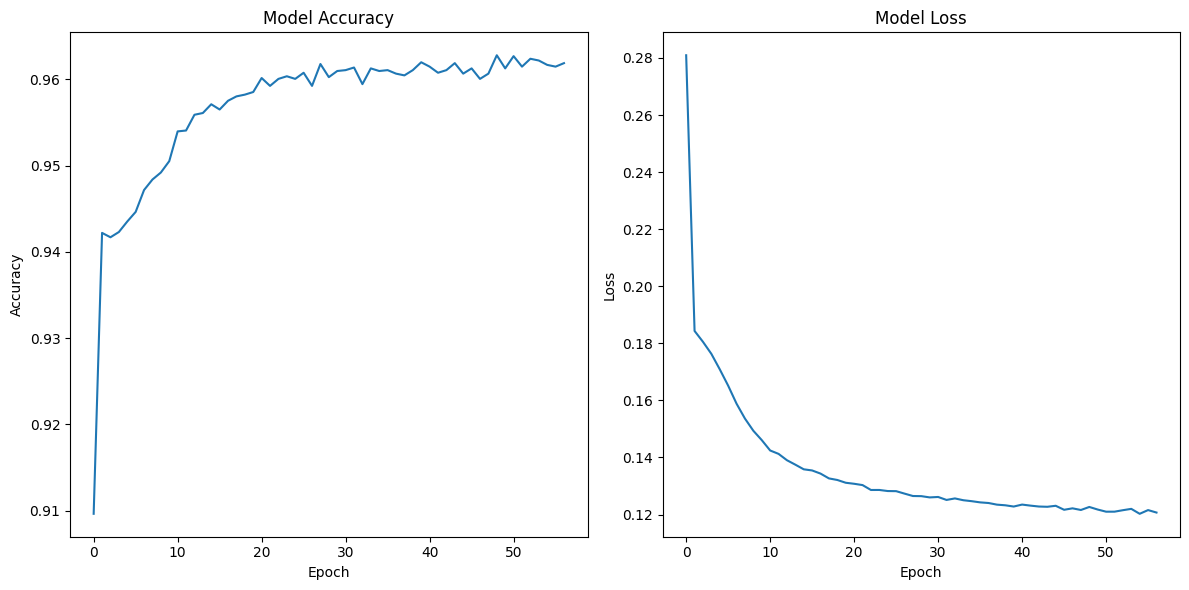

In [74]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


In [75]:
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)
X_train.head()

shape of training data: (12327, 7)
shape of test data: (3082, 7)


,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration
2815,0.059475,0.060806,0.061339,0.022782,0.022782,0.370192,0.804133
7387,0.052336,0.054693,0.057354,0.015801,0.015801,0.634739,0.807421
10544,0.177514,0.174588,0.181258,0.164570,0.164570,0.653530,0.817285
14208,0.220881,0.220788,0.239785,0.224134,0.224134,0.611442,0.853452
10959,0.043355,0.038450,0.043511,0.000018,0.000018,0.528722,0.805073


In [76]:
pred = model.predict(X_test)
pd.DataFrame(pred)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step


,0
0,0.058889
1,0.031947
2,0.521890
3,0.028199
4,0.003366
...,...
3077,0.075254
3078,0.004582
3079,1.000000
3080,0.556988


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
Best Threshold=0.562751, F-Score=0.824


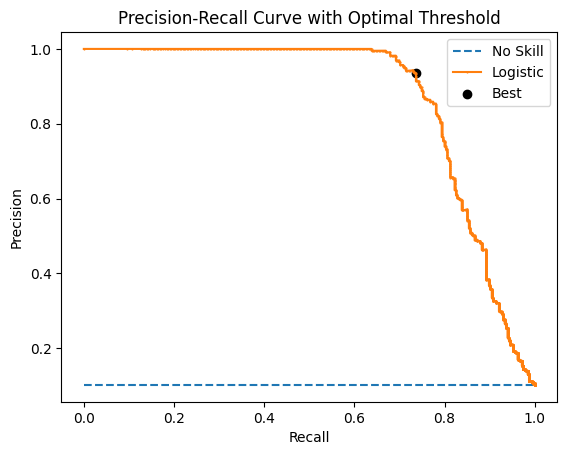

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from numpy import argmax

# Get predictions
preds = model.predict(X_test).ravel()  # Flatten the output to a 1D array if necessary

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, preds)

# Convert to F-score
fscore = (2 * precision * recall) / (precision + recall)

# Locate the index of the largest F-score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# Plot precision-recall curve
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic', markersize=1)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')

# Axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve with Optimal Threshold')

# Show the plot
plt.show()


In [78]:
#defining threshold as 0.5
pred = model.predict(X_test)
pred = [1 if y>=0.562894 else 0 for y in pred]
pred

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [79]:
#Show the actual values
Y_test

14702    0
1980     0
5631     1
2661     0
5412     0
        ..
11755    0
3205     0
12618    1
8769     0
4137     1
Name: classification, Length: 3082, dtype: int64

In [80]:
# model evaluation
loss , accuracy =  model.evaluate(X_test, Y_test)
print('Accuracy :', accuracy*100)

#Show the actual and predicted values
print('Original : {0}'.format(", ".join(str(x) for x in Y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

# input samples
print('Input samples' , X_test.shape)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9637 - loss: 0.1288
Accuracy : 96.49578332901001
Original : 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [81]:
x = datetime.datetime.now()
print("Today's date: ")
print(x.strftime("%x"))

Today's date: 
08/12/24


In [82]:
from datetime import date
from dateutil.relativedelta import relativedelta

six_months = date.today() + relativedelta(months=+6)
print("Scheduled Maintenance Date: ")
print(six_months.strftime("%x"))

Scheduled Maintenance Date: 
02/12/25


In [83]:
from datetime import timedelta
# numpy array to pandas series
pred = np.array(pred)
n = (pred == 1).sum()
days_to_subtract = n/24 + 1
d = six_months - timedelta(days=days_to_subtract)
print("Predicted Maintenance Date: ")
print(d.strftime("%x"))

Predicted Maintenance Date: 
02/01/25


In [84]:
p = (24-n)/2400
print("Life of the machine is degraded by: ")
print(p)

Life of the machine is degraded by: 
-0.09291666666666666
